**This notebook is an exercise in the [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/your-first-map).**

---

Tutorial Done below using geopandas and a NY department of environmental conservation data set 

In [2]:
import geopandas as gpd 

In [3]:
# uses shapefile, most common file format, others include geojson
full_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")

full_data.head()

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


In [4]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
# select all of the rows and then only a subset of the columns and make copy 
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()

data.CLASS.value_counts()

WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [6]:
# select only wild

wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()

wild_lands.head()

,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.200 4..."


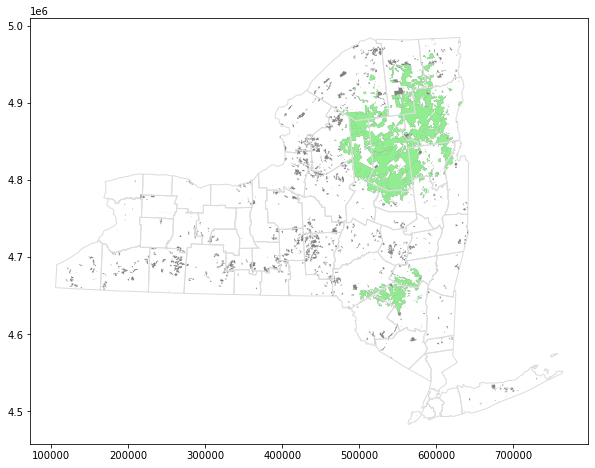

In [7]:
# plot wild only and then everything, uses the geometry column
# geometry can be either POLYGON, LINE or POINT
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")
# order of operations important, do all first, and then wild
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

data.plot(color='gray', ax=ax)
wild_lands.plot(color='lightgreen', ax=ax); 



In [8]:
# campsites in new york (Point)
POI_data = gpd.read_file("../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET=='PRIMITIVE CAMPSITE'].copy()

# foot trails (LineString)
roads_trails = gpd.read_file("../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET=='FOOT TRAIL'].copy()

# County boundaries in New York state (Polygon)
counties = gpd.read_file("../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")

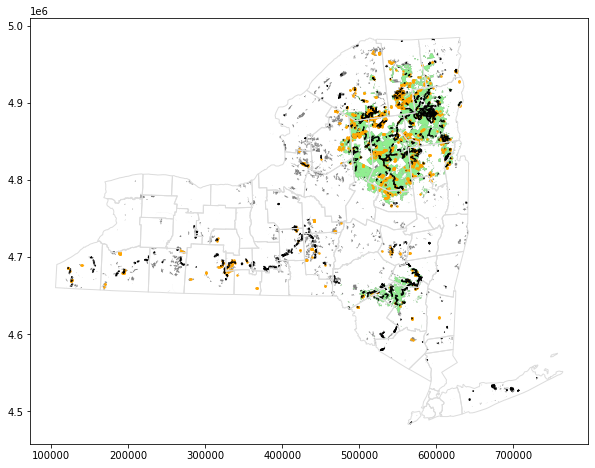

In [9]:
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

data.plot(color='gray', ax=ax)
wild_lands.plot(color='lightgreen', ax=ax)
campsites.plot(color='orange', markersize=2, ax=ax)
trails.plot(color='black', markersize=1, ax=ax);


# Introduction

[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

To get started, run the code cell below to set up our feedback system.

In [10]:
import geopandas as gpd

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex1 import *

### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [11]:
loans_filepath = "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

# Check your answer
q_1.check()

# Uncomment to view the first five rows of the data
#world_loans.head()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [12]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) Plot the data.

Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.

In [13]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

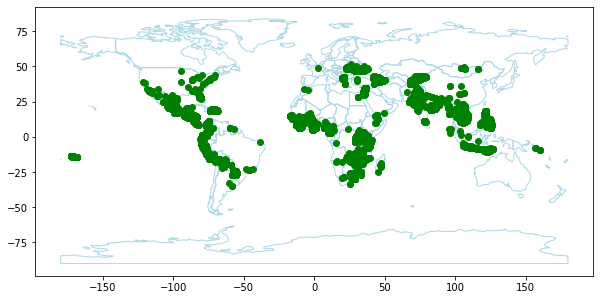

In [14]:
# Your code here
ax = world.plot(figsize=(10,10), color='none', edgecolor='lightblue')

#world.plot(ax=ax)
world_loans.plot(color='green',ax=ax);
# Uncomment to see a hint
#q_2.hint()

In [15]:
# Get credit for your work after you have created a map
q_2.check()

# Uncomment to see our solution (your code may look different!)
#q_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [16]:
world_loans.head(5)

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
0,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,450,POINT (102.89751 13.66726)
1,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,20275,POINT (102.98962 13.02870)
2,9,KREDIT Microfinance Institution,General Financial Inclusion,Higher Education,Cambodia,9150,POINT (102.98962 13.02870)
3,9,KREDIT Microfinance Institution,General Financial Inclusion,Vulnerable Populations,Cambodia,604950,POINT (105.31312 12.09829)
4,9,KREDIT Microfinance Institution,General Financial Inclusion,Sanitation,Cambodia,275,POINT (105.31312 12.09829)


In [18]:
# Your code here
PHL_loans = world_loans[world_loans.country == 'Philippines']

# Check your answer
q_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#q_3.hint()
#q_3.solution()

### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [19]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../input/geospatial-learn-course-data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

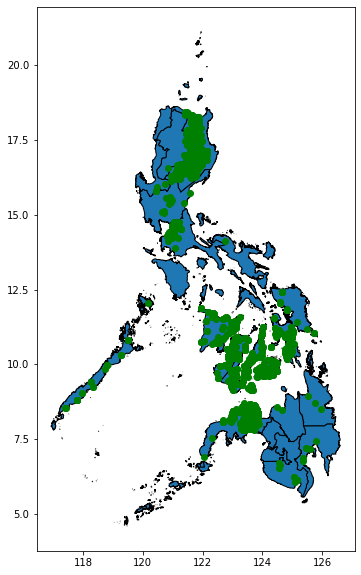

In [23]:
# Your code here
ax = PHL.plot(figsize=(10,10), color='gray',edgecolor='black')

PHL_loans.plot(ax=ax, color='green')

# Uncomment to see a hint
#q_4.a.hint()

In [22]:
# Get credit for your work after you have created a map
q_4.a.check()

# Uncomment to see our solution (your code may look different!)
q_4.a.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Thank you for creating a map!</span>

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)

```

Can you identify any islands where it might be useful to recruit new Field Partners?  Do any islands currently look outside of Kiva's reach?

You might find [this map](https://bit.ly/2U2G7x7) useful to answer the question.

In [ ]:
# View the solution (Run this code cell to receive credit!)
q_4.b.solution()

# Keep going

Continue to learn about **[coordinate reference systems](https://www.kaggle.com/alexisbcook/coordinate-reference-systems)**.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161464) to chat with other Learners.*